# Proyecto 04 - Procesamiento del Lenguaje Natural - Mejorado

#### Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

1. Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:


2. Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.


3. Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.


4. Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.


5. Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.


Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

# PARTE A - Proyecto 3
#### ANALISIS 

In [1]:
import itertools #operaciones que requieren usar iteradores 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
import spacy
import unicodedata
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from spacy.lang.es.stop_words import STOP_WORDS
import html
nltk.download('punkt') #Diccionario de palabras ofensoras - groserias
nltk.download('stopwords') #Palabras que no aportan tanto a la frase

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

---
Analisis inicial de los tres datasets. Viendo sus atributos.

In [ ]:
dataset_dev = pd.read_json('dataset_es_dev.json', lines=True)
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [ ]:
dataset_train = pd.read_json('dataset_es_train.json', lines=True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [ ]:
dataset_test = pd.read_json('dataset_es_test.json', lines=True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [ ]:
dataset_dev.shape

(5000, 8)

In [ ]:
dataset_train.shape

(200000, 8)

In [ ]:
dataset_test.shape

(5000, 8)

---
Serán datasets balanceados? Al ser balanceados, se puede usar el Accuracy como metrica. En este caso se usará

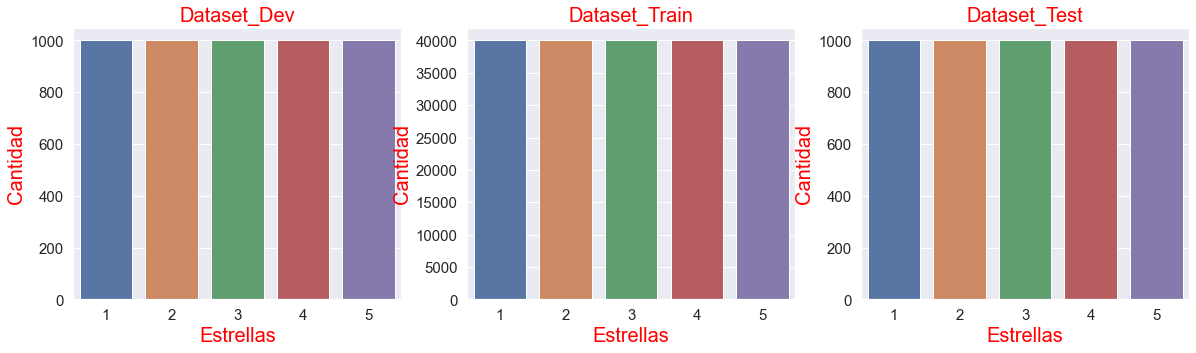

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plot=sns.countplot(x='stars', data=dataset_dev)
plt.title('Dataset_Dev', fontsize=20).set_color('red');
plt.xlabel('Estrellas', fontsize=20).set_color('red');
plt.ylabel('Cantidad', fontsize=20).set_color('red');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

plt.subplot(1,3,2)
plot=sns.countplot(x='stars', data=dataset_train)
plt.title('Dataset_Train', fontsize=20).set_color('red');
plt.xlabel('Estrellas', fontsize=20).set_color('red');
plt.ylabel('Cantidad', fontsize=20).set_color('red');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

plt.subplot(1,3,3)
plot=sns.countplot(x='stars', data=dataset_test)
plt.title('Dataset_Test', fontsize=20).set_color('red');
plt.xlabel('Estrellas', fontsize=20).set_color('red');
plt.ylabel('Cantidad', fontsize=20).set_color('red');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

plt.show()

---
Tendrá casillas vacías?

In [ ]:
valores=dataset_train.isna().sum()
valores

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [ ]:
valores=dataset_test.isna().sum()
valores

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

---
Analizar la distribución de las categorías en todo el dataset

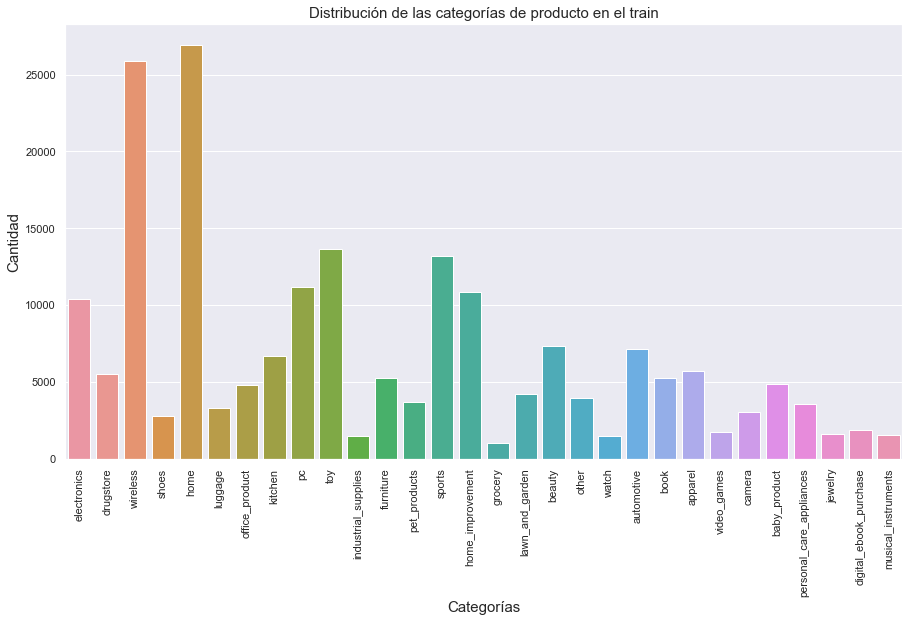

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data = dataset_train, x ="product_category")
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title('Distribución de las categorías de producto en el train', fontsize=15);
plt.xlabel('Categorías', fontsize=15);
plt.ylabel('Cantidad', fontsize=15);
plt.show()

---
Observar la distribución de las categorías de acuerdo a las estrellas, para ver si hay alguna relación entre ellas y la clasificación que se le asigna a cada producto

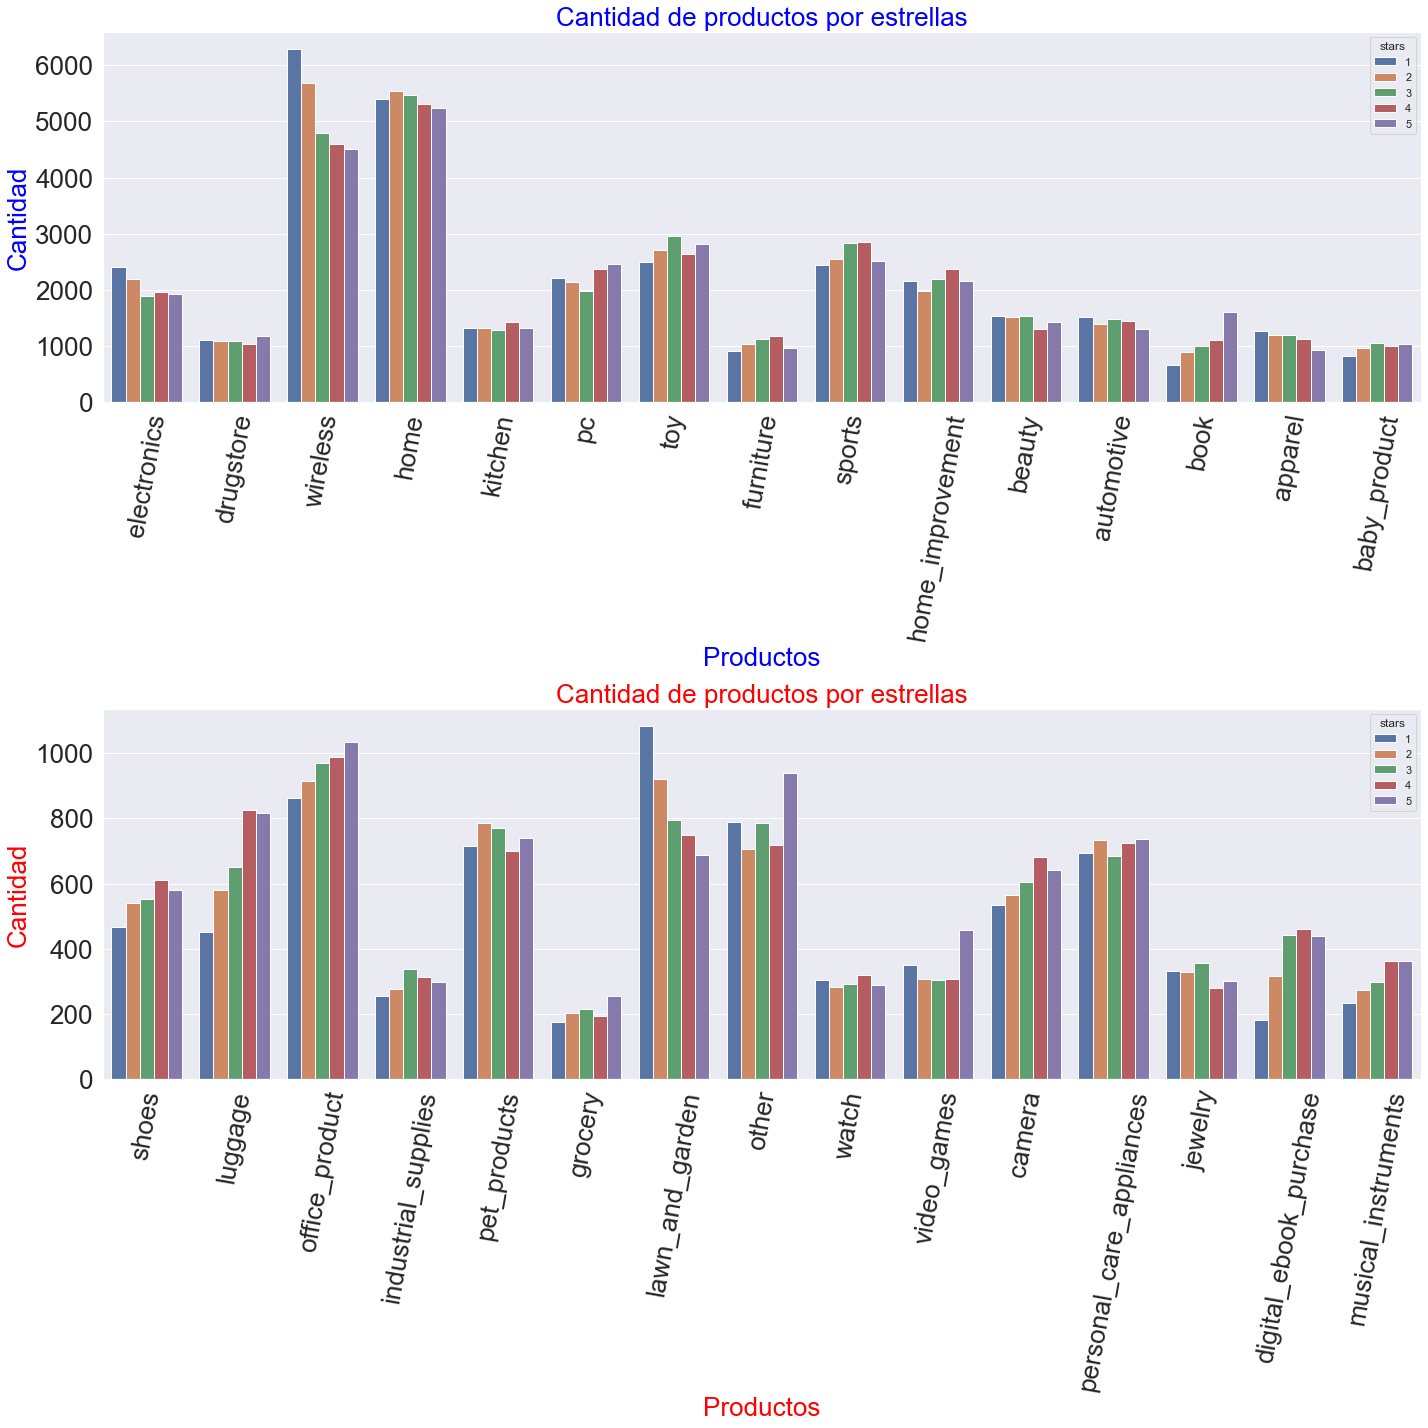

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(2,1,1)
g1=sns.countplot(data = dataset_train[(dataset_train.product_category.isin(['home', 
'wireless', 'toy', 'sports', 'pc', 'home_improvement', 'electronics', 'beauty', 'automotive',
'kitchen', 'apparel', 'drugstore','book','furniture','baby_product']))], hue ="stars", x = "product_category");
plt.xticks(rotation=80, fontsize=26);
plt.yticks(fontsize=26);
plt.title('Cantidad de productos por estrellas', fontsize=26).set_color('blue');
plt.xlabel('Productos', fontsize=26).set_color('blue');
plt.ylabel('Cantidad', fontsize=26).set_color('blue');

plt.subplot(2,1,2)
g1=sns.countplot(data = dataset_train[(dataset_train.product_category.isin(['office_product','lawn_and_garden',
'other', 'pet_products', 'personal_care_appliances', 'luggage', 'camera', 'shoes', 'digital_ebook_purchase', 'video_games',
'jewelry', 'musical_instruments', 'watch', 'industrial_supplies', 'grocery']))], hue ="stars", x = "product_category");
plt.xticks(rotation=80, fontsize=26);
plt.yticks(fontsize=26);
plt.title('Cantidad de productos por estrellas', fontsize=26).set_color('red');
plt.xlabel('Productos', fontsize=26).set_color('red');
plt.ylabel('Cantidad', fontsize=26).set_color('red');

plt.tight_layout()
plt.show()

---
Observar reviews aleatoriamente

In [ ]:
index_random = np.random.randint(0,200000)
review1 = dataset_train.review_body.iloc[index_random]
print(index_random, review1, dataset_train.stars.iloc[index_random])

80787 Se disuelve regular y sabe mal. Mejor pastillas 3


In [ ]:
index_random = np.random.randint(0,200000)
review2 = dataset_train.review_body.iloc[index_random]
print(index_random, review2, dataset_train.stars.iloc[index_random])

148729 Perfecto para el Vectra C gts 2004. Lo único hace un pelín de lupa pero nada exagerado, todo es acostumbrarse. 4


In [ ]:
index_random = np.random.randint(0,200000)
review3 = dataset_train.review_body.iloc[index_random]
print(index_random, review3, dataset_train.stars.iloc[index_random])

72812 El producto llegó en tiempo pero el resultado del mismo no fue del todo satisfactorio terminé tirando a la basura 2


In [ ]:
index_random = np.random.randint(0,200000)
reviewt1 = dataset_train.review_title.iloc[index_random]
print(index_random, reviewt1, dataset_train.stars.iloc[index_random])

42701 NO ME HA DURADO NADA. 2


In [ ]:
index_random = np.random.randint(0,200000)
reviewt2 = dataset_train.review_title.iloc[index_random]
print(index_random, reviewt2, dataset_train.stars.iloc[index_random])

70607 Se escucha bajito. 2


In [ ]:
index_random = np.random.randint(0,200000)
reviewt3 = dataset_train.review_title.iloc[index_random]
print(index_random, reviewt3, dataset_train.stars.iloc[index_random])

88269 Fiel a la descripción. 3


In [ ]:
index_random = np.random.randint(0,200000)
reviewt4 = dataset_train.review_title.iloc[index_random]
print(index_random, reviewt4, dataset_train.stars.iloc[index_random])

16343 No sirven para aguantar toda la noche como un pañal 1


En los reviews, se preentan muchos errores ortograficos, emoticones, simbolos y espacios en blancos innecearios.

---

In [ ]:
all_reviews=[]
all_titles=[]
b=[]
c=[]
for i in range (0,200000):
    titles=dataset_train.review_title.iloc[i]
    b=i,titles
    all_titles.append(b)
    
for j in range (0,200000):
    reviews=dataset_train.review_body[j]
    c=j,reviews
    all_reviews.append(c)

---
Distribución de la longitud de los reviews y titles. Esto es util, al momento de seleccionar el rango de los N-gramas en la vectorización.

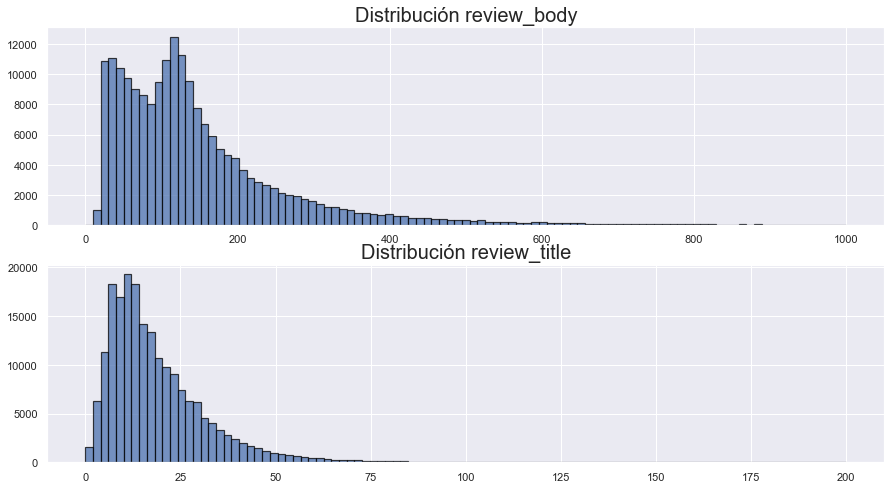

In [ ]:
len_review=[]
for review in dataset_train.review_body:
    a=len(review)
    len_review.append(a)
    
len_review_2=[]
for review in dataset_train.review_title:
    a=len(review)
    len_review_2.append(a)
    
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.hist(len_review, bins = np.linspace(0,1000,100), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.title("Distribución review_body", fontsize=20)

plt.subplot(2,1,2)
plt.hist(len_review_2, bins = np.linspace(0,200,100), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.title("Distribución review_title", fontsize=20)
plt.show()

plt.show()

---
Usaremos de modelo, estos dos reviews los cuales tienen comas, mayusculas, emoticones y tildes.

In [ ]:
print(dataset_train["review_body"].iloc[924])

muy mal calidad,no funciona bien,muchas horas cargando muy poco 😓


In [ ]:
print(dataset_train["review_body"].iloc[1])

Horrible, nos tuvimos que comprar otro porque ni nosotros que sabemos inglés, ni un informático, después de una hora fue capaz de instalarlo


---
Retiramos los signos que no forman palabras (#, @, !, ?, emoticones), tenemos en cuenta las tildes y ponemos todo en minusculas (tanto para el dataset de train como de test).

In [ ]:
import re   

def limpiar_caracteres (documento):
    global frases
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    limpio = []
    todas_frases = nltk.sent_tokenize(documento)
    for frases in todas_frases:
        frases=frases.lower() #Convertir a minusculas 
        frases=re.sub("[^a-zA-ZÀ-ÿ\u00f1\u00d1]"," ",str(frases)) #Incluir la Ñ y las tildes
        frases=re.sub(regex , ' ',str(frases)) #Eliminar signos de puntuación
        frases=re.sub("\d+", ' ',str(frases)) #Eliminar numeros
        frases=re.sub("\\s+", ' ',str(frases)) #Eliminar espacios multiples en blanco
        frases=nltk.RegexpTokenizer('[\w]+').tokenize(frases)
        frases = [token for token in frases if len(token) > 2] #Retirar tokens menores a 2
        limpio.extend(frases)
    return " ".join(frases)

In [ ]:
dataset_train["review_title"] = dataset_train["review_title"].apply(lambda row: limpiar_caracteres (row))
dataset_train["review_body"] = dataset_train["review_body"].apply(lambda row: limpiar_caracteres (row))
print(dataset_train["review_body"].iloc[924])

In [ ]:
dataset_test["review_body"] = dataset_test["review_body"].apply(lambda row: limpiar_caracteres (row))
dataset_test["review_title"] = dataset_test["review_title"].apply(lambda row: limpiar_caracteres (row))

In [ ]:
print(dataset_train["review_body"].iloc[1])

---
Lematizar con Spacy. Se elige Spacy que NLTK porque tiene un diccionario mucho mas desarrollador en el español y tiende a ser mas rapido.

In [ ]:
sp = spacy.load('es_core_news_lg')

A diferentencia de NLTK, Spacy cuando va a lematizar, ya caracteriza las palabaras que se van a intervenir automaticamente.

---
Agregamos los stopwords y veamos un ejemplo.

In [ ]:
stopwords = STOP_WORDS

In [ ]:
def lemmatizer3(text):  
    doc = sp(text)
    return ' '.join([word.lemma_ for word in doc if word.is_alpha and word.text not in stopwords])


Por ultimo agregamos lematización a nuestros datasets.

In [ ]:
dataset_test["review_body_lemma"] = dataset_test["review_body"].apply(lemmatizer3)
dataset_test["review_title_lemma"] = dataset_test["review_title"].apply(lemmatizer3)

In [ ]:
dataset_train["review_body_lemma"] = dataset_train["review_body"].apply(lemmatizer3)
dataset_train["review_title_lemma"] = dataset_train["review_title"].apply(lemmatizer3)

In [ ]:
print(dataset_train["review_body"].iloc[924])

muy mal calidad funciona bien muchas horas cargando muy poco


In [ ]:
print(dataset_train["review_body_lemma"].iloc[924])

calidad funcionar cargar


In [ ]:
dataset_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_lemma,review_title_lemma
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno fue pantalla menos meses recibido r...,television nevir,es,electronics,pantalla mesar recibir respuesta fabricante,television nevir
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,horrible nos tuvimos que comprar otro porque n...,dinero tirado basura con esta compra,es,electronics,horrible tener comprar inglés informático hora...,dinero tirar basura comprar
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,,solo llega una unidad cuando obligan comprar dos,es,drugstore,,llegar unidad obligar comprar
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,ustedes deciden,producto recibido,es,wireless,decidir,producto recibir
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde talla equivocada,devuelto,es,shoes,llegar tallar equivocar,devolver
...,...,...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,una buena eleccion precio risa,tal como describe,es,electronics,eleccion preciar risa,describir
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,recomendable,funciona perfectamente,es,electronics,recomendable,funcionar perfectamente
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,satisfecha con compra,buena calidad,es,apparel,satisfacer comprar,calidad
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,perfecto para cumple hijo,recomendado,es,toy,perfecto cumplir hijo,recomendar


---
CountVectorizer es la manera de convertir los datos tipo strings de manera numerica de acuerdo a la frecuencia con la que aparece.

In [ ]:
Count_Body = list(dataset_train.review_body_lemma.values)
Count_Title = list(dataset_train.review_title_lemma.values)
Estrellas = dataset_train.stars.values

In [ ]:
cou_vec=CountVectorizer(ngram_range=(1, 5))

In [ ]:
matriz_body = cou_vec.fit_transform(Count_Body)
matriz_title = cou_vec.fit_transform(Count_Title)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 150 palabras o pequeñas frases mas usadas
print("150 palabras mas usadas: ",all_words[0:150])

150 palabras mas usadas:  ['10', '10 remachar', 'aaa', 'aaaaa', 'aaron', 'abajar', 'abajar calidad', 'abajar ceder', 'abajar duro', 'abajar fundir', 'abajar fundir plastico', 'abajar fundir plastico malo', 'abajar pequeño', 'abajar pequeño tocar', 'abajar perder', 'abajar play', 'abajar play stop', 'abajar servir', 'abalorio', 'abandonar', 'abandonar librar', 'abandonar librar buzón', 'abandonar librar buzón forzándolo', 'abanicar', 'abanicar cutre', 'abanico', 'abanico blanco', 'abanico blanco corazón', 'abanico perfecto', 'abanico perfecto recordar', 'abar', 'abarcar', 'abarcar año', 'abarcar concepto', 'abarcar concepto fundamental', 'abarcar pantalla', 'abarcar pantalla entero', 'abarcar pantalla susceptible', 'abarcar pantalla susceptible pequeño', 'abarcar pantalla susceptible pequeño fracturar', 'abarcar reducir', 'abarcar reducir librar', 'abascal', 'abastecimiento', 'abastecimiento tinto', 'abatible', 'abc', 'abdel', 'abdomen', 'abdominal', 'abdominal funcionar', 'abdominal re

---
De igual forma, aplicamos Vectorizacion con TF-IDF para ver como se comporta. Además este tipo de vectorización es mejor que el anterior porque se basa en la frecuencia de una palabra y en la importancia que suministra para todo el corpus, facilitando así que el modelo clasifique de mejor manera.

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 500), min_df=3)

In [ ]:
X1 = tfidf.fit_transform(dataset_train['review_body_lemma'])
X2 = tfidf.fit_transform(dataset_train['review_title_lemma'])

In [ ]:
y_train=dataset_train['stars']
y_test=dataset_test['stars']

In [ ]:
X1.shape, X2.shape

((200000, 63533), (200000, 12905))

In [ ]:
print(tfidf.idf_) 

[11.81978328  9.83878182 11.41431818 ... 11.81978328 11.41431818
 11.59663973]


---
### PREGUNTA
¿Que tan importante es tener en cuenta las tildes de las palabras?

A diferencia del idioma ingles, muchas de las palabras en español necesitan la tilde para tener un significado concreto. Si implementamos eliminar las tildes al momento de hacer limpieza, se va a dificultar la lematización y el programa va a terminar de clasificar de mala manera dichas palabras. Veamos un ejemplo.

In [ ]:
text1 = "hola, no quiero saber inglés"
for token in sp(text1):
    print(token.text, token.lemma_, token.pos_, token.dep_)

hola hola PROPN nsubj
, , PUNCT punct
no no ADV advmod
quiero querer VERB ROOT
saber saber VERB xcomp
inglés inglés NOUN obj


In [ ]:
lemmatizer3 ("hola, no quiero saber inglés")

'hola querer inglés'

Ahora miremos retirando la tilde a la palabra "Inglés"

In [ ]:
text1 = "hola, no quiero saber ingles"
for token in sp(text1):
    print(token.text, token.lemma_, token.pos_, token.dep_)

hola hola PROPN nsubj
, , PUNCT punct
no no ADV advmod
quiero querer VERB ROOT
saber saber VERB xcomp
ingles ingle PROPN obj


In [ ]:
lemmatizer3 ("hola, no quiero saber ingles")

'hola querer ingle'

Como se puede observar, cambia completamente el significado de la palabra. Con tilde lo clasifica como un sustantitvo, sin tilde lo clasifica como un pronombre. Además que con tilde lo clasifica como el lenguaje ingles y sin tilde como la parte del cuerpo humano.

---
# PARTE B - Proyecto 3

#### MODELOS

---

In [ ]:
def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
tfidf_train_body = tfidf.transform(dataset_train['review_body_lemma'])
tfidf_test_body = tfidf.transform(dataset_test['review_body_lemma'])
tfidf_train_title = tfidf.transform(dataset_train['review_title_lemma'])
tfidf_test_title = tfidf.transform(dataset_test['review_title_lemma'])

In [ ]:
couvec_train_body = cou_vec.transform(dataset_train['review_body_lemma'])
couvec_test_body = cou_vec.transform(dataset_test['review_body_lemma'])
couvec_train_title = cou_vec.transform(dataset_train['review_title_lemma'])
couvec_test_title = cou_vec.transform(dataset_test['review_title_lemma'])

---
Inicialmente haremos SVC con el count vectorizer del review_body sin tocar los hiperparametros, esté sera nuestro Benchmark

In [ ]:
clf_couvec_body = LinearSVC()

In [ ]:
clf_couvec_body.fit(couvec_train_body, y_train)

LinearSVC()

In [ ]:
y_pred = clf_couvec_body.predict(couvec_test_body)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.55      0.52      1000
           2       0.32      0.28      0.30      1000
           3       0.33      0.28      0.31      1000
           4       0.32      0.28      0.29      1000
           5       0.41      0.51      0.45      1000

    accuracy                           0.38      5000
   macro avg       0.37      0.38      0.37      5000
weighted avg       0.37      0.38      0.37      5000



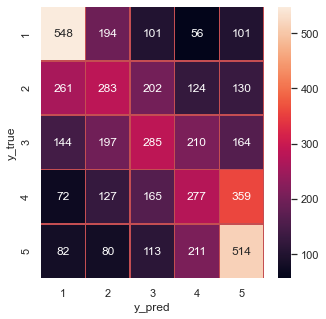

In [ ]:
confusion(y_test,y_pred)

---
Ahora haremos SVC con el count vectorizer del review_title. Tiende a mejorar cuando se trata de usar en los atributos, solo el titulo. Por lo que es mejor hasta el momento, trabajar con el Review_title.

In [ ]:
clf_couvec_title = LinearSVC()

In [ ]:
clf_couvec_title = LinearSVC()
clf_couvec_title.fit(couvec_train_title, y_train)
y_pred = clf_couvec_title.predict(couvec_test_title)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.54      0.55      1000
           2       0.38      0.36      0.37      1000
           3       0.35      0.24      0.28      1000
           4       0.33      0.47      0.39      1000
           5       0.48      0.47      0.47      1000

    accuracy                           0.42      5000
   macro avg       0.42      0.42      0.41      5000
weighted avg       0.42      0.42      0.41      5000



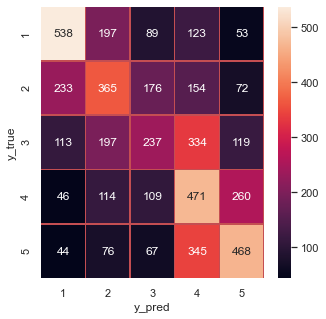

In [ ]:
confusion(y_test,y_pred)

---
Ahora haremos SVC con el tfidf del review_body

In [ ]:
clf_tfidf_body = LinearSVC()

In [ ]:
clf_tfidf_body = LinearSVC()
clf_tfidf_body.fit(tfidf_train_body, y_train)
y_pred = clf_tfidf_body.predict(tfidf_test_body)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.59      0.53      1000
           2       0.35      0.30      0.32      1000
           3       0.31      0.27      0.29      1000
           4       0.33      0.27      0.29      1000
           5       0.43      0.53      0.48      1000

    accuracy                           0.39      5000
   macro avg       0.38      0.39      0.38      5000
weighted avg       0.38      0.39      0.38      5000



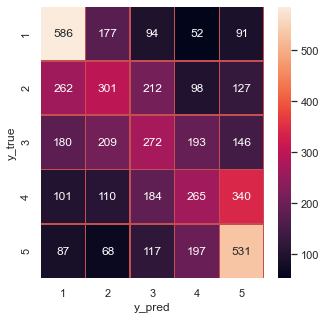

In [ ]:
confusion(y_test,y_pred)

---
Ahora haremos SVC con el tfidf del review_title

In [ ]:
clf_tfidf_title = LinearSVC()

In [ ]:
clf_tfidf_title = LinearSVC()
clf_tfidf_title.fit(tfidf_train_title, y_train)
y_pred = clf_tfidf_title.predict(tfidf_test_title)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.54      0.54      1000
           2       0.39      0.37      0.38      1000
           3       0.34      0.23      0.28      1000
           4       0.32      0.47      0.38      1000
           5       0.49      0.46      0.47      1000

    accuracy                           0.41      5000
   macro avg       0.42      0.41      0.41      5000
weighted avg       0.42      0.41      0.41      5000



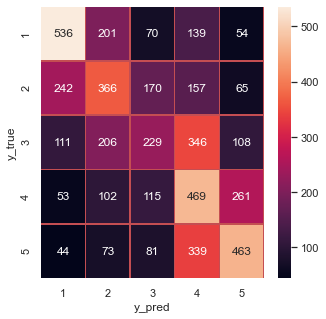

In [ ]:
confusion(y_test,y_pred)

---
Usar GridSearch en el modelo con mejor resultado para optimizar su hiperparametro "C".

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = clf_couvec_title,
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 5, 
        verbose    = 0,
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
#grid.fit(X = couvec_train_title, y = y_train)

In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
clf_couvec_title = LinearSVC(C = 0.03593813663804626)
clf_couvec_title.fit(couvec_train_title, y_train)

LinearSVC(C=0.03593813663804626)

In [ ]:
y_pred = clf_couvec_title.predict(couvec_test_title)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.55      0.55      1000
           2       0.39      0.33      0.36      1000
           3       0.34      0.25      0.29      1000
           4       0.33      0.47      0.38      1000
           5       0.49      0.49      0.49      1000

    accuracy                           0.42      5000
   macro avg       0.42      0.42      0.41      5000
weighted avg       0.42      0.42      0.41      5000



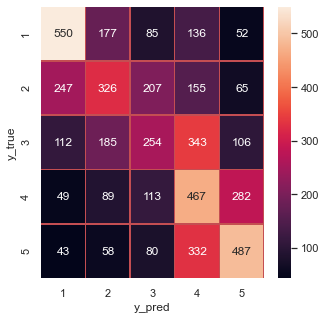

In [ ]:
confusion(y_test,y_pred)

---

Adicionaremos otro modelo (RandmoForest) para ver su comportamiento. Sin embargo, no lo seleccioné para optimizar sus parametros, por el costo computacional que genera.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(tfidf_train_title, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_tfidf.predict(tfidf_test_title)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.53      0.53      1000
           2       0.38      0.34      0.36      1000
           3       0.35      0.23      0.27      1000
           4       0.32      0.47      0.38      1000
           5       0.48      0.45      0.46      1000

    accuracy                           0.40      5000
   macro avg       0.41      0.40      0.40      5000
weighted avg       0.41      0.40      0.40      5000



In [ ]:
rf_couvec = RandomForestClassifier()

In [ ]:
rf_couvec.fit(couvec_train_title, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_couvec.predict(couvec_test_title)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.55      0.54      1000
           2       0.39      0.35      0.37      1000
           3       0.34      0.23      0.28      1000
           4       0.33      0.48      0.39      1000
           5       0.48      0.46      0.47      1000

    accuracy                           0.41      5000
   macro avg       0.41      0.41      0.41      5000
weighted avg       0.41      0.41      0.41      5000



---
Ahora hagamos pruebas con el modelo con mejor Accuracy y veamos como se comporta.

In [ ]:
prueba = 'Me encantó'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([5], dtype=int64)

In [ ]:
prueba = 'No me gustó en lo absoluto'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([1], dtype=int64)

In [ ]:
prueba = 'Buena calidad-precio, lo recomiendo'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([4], dtype=int64)

In [ ]:
prueba = 'Se demoró mucho'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([2], dtype=int64)

In [ ]:
prueba = 'Llegó a tiempo'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([4], dtype=int64)

In [ ]:
prueba = 'Es útil pero no me agrada'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([2], dtype=int64)

In [ ]:
prueba = 'Me gustó'
prueba = limpiar_caracteres(prueba)
prueba = lemmatizer3(prueba)
vector = cou_vec.transform ([prueba])
clf_couvec_title.predict(vector)

array([2], dtype=int64)

---
Es aceptable pero sigue teniendo ciertos errores. Veamos sus parametros.

In [ ]:
clf_couvec_title.get_params()

{'C': 0.03593813663804626,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Este modelo se basa principalmente en los resultados obtenidos por la vectorización, puesto que antes de utilizar un modelo, hay que transformar los datos de acuerdo al modelo de vectorización escogido, teniendo en cuenta que los convierte de manera numerica para que sea mas simple al modelo. Las Maquinas de Vectores de Soporte, en este caso lineal permite encontrar de manera eficiente la clasificación entre varias clases maximizando el margen de separación entre las clases.

---
# PARTE C - Proyecto 3

#### PROXIMOS PASOS Y OTRAS IMPLEMENTACIONES

---
Ingresemos una nube de palabras para ver cuales son las palabras mas usadas de acuerdo a la clasificación.

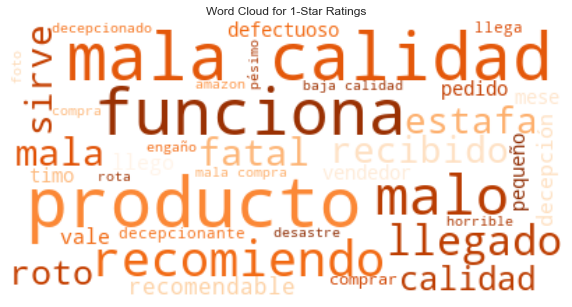

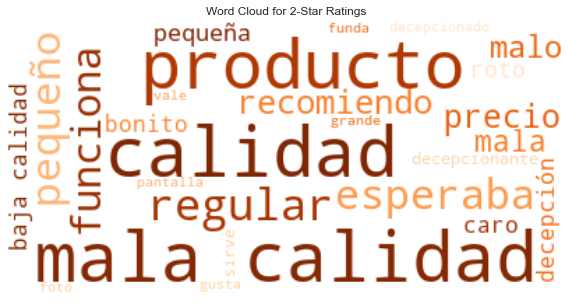

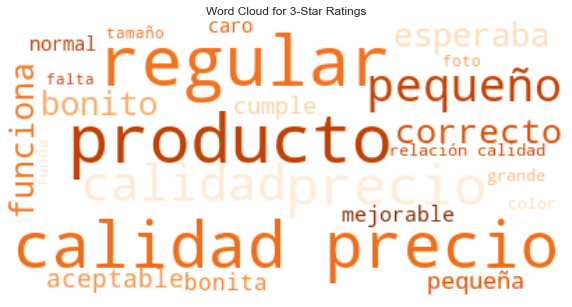

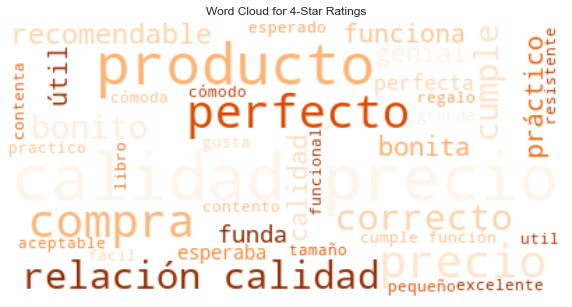

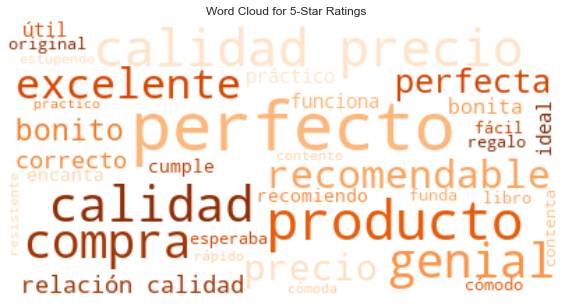

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = stopwords, min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(dataset_train[dataset_train["stars"]==1]["review_title"].values).lower()
two_star_text = " ".join(dataset_train[dataset_train["stars"]==2]["review_title"].values).lower()
three_star_text = " ".join(dataset_train[dataset_train["stars"]==3]["review_title"].values).lower()
four_star_text = " ".join(dataset_train[dataset_train["stars"]==4]["review_title"].values).lower()
five_star_text = " ".join(dataset_train[dataset_train["stars"]==5]["review_title"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()

---
### Preguntas

1. ¿Que otra manera hay de clasificar estos reviews?
2. ¿Que metodologías se pueden implementar para mejorar la clasificación por estrellas?
3. ¿Que herramientas o librerías serían utiles para mejorar resultados?


### Respuestas
1. Me gustaría ver los resultados binarizando el problema.

Este tipo de analisis está sesgado mas que todo por como es el comportamiento emocional y sentimental del usuario. Por lo que muchas veces por ejemplo no es posible clasificar entre algo bueno o malo si la calificación es 3. Una buena manera de clasificar la satisfacción de los clientes, sería binarizando el problema y asumiendo que no existen criticas indecisas o con incertidumbre sino que ya se limitaría a clasificar entre si es bueno o no el producto.

Para este caso y de acuerdo a la matriz de confusión del modelo con mejores resultados. La clasificación de 3 estrellas tiende a mezclarse con las criticas buenas, por lo que se optó en redefinir el target.

In [ ]:
dataset_train["stars_binario"] = dataset_train['stars'].map({1:0,
                             2:0,
                             3:1,
                             4:1,
                             5:1},
                             na_action=None)

dataset_test["stars_binario"] = dataset_test['stars'].map({1:0,
                             2:0,
                             3:1,
                             4:1,
                             5:1},
                             na_action=None)

In [ ]:
dataset_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_lemma,review_title_lemma,stars_binario
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno fue pantalla menos meses recibido r...,television nevir,es,electronics,pantalla mesar recibir respuesta fabricante,television nevir,0
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,horrible nos tuvimos que comprar otro porque n...,dinero tirado basura con esta compra,es,electronics,horrible tener comprar inglés informático hora...,dinero tirar basura comprar,0
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,,solo llega una unidad cuando obligan comprar dos,es,drugstore,,llegar unidad obligar comprar,0
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,ustedes deciden,producto recibido,es,wireless,decidir,producto recibir,0
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde talla equivocada,devuelto,es,shoes,llegar tallar equivocar,devolver,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,una buena eleccion precio risa,tal como describe,es,electronics,eleccion preciar risa,describir,1
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,recomendable,funciona perfectamente,es,electronics,recomendable,funcionar perfectamente,1
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,satisfecha con compra,buena calidad,es,apparel,satisfacer comprar,calidad,1
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,perfecto para cumple hijo,recomendado,es,toy,perfecto cumplir hijo,recomendar,1


In [ ]:
dataset_test

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_lemma,review_title_lemma,stars_binario
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,llego articulo mando por correos normal sin se...,llego,es,wireless,llegar articular mandar correo normal seguimie...,llegar,0
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,mensajería horrible compro mas,amazon sigue sin cumplir las entregas,es,home,mensajería horrible comprar,amazon cumplir entregar,0
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,recomiendo nada,estafa envío,es,toy,recomer,estafar enviar,0
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,inverosímil ocurrido pero ultima palabra dará ...,estafa amazon,es,home,inverosímil ocurrir ultimar palabra dar oficin...,estafar amazon,0
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,puedo valorar nada nada,conseguí pasar portada kindle,es,digital_ebook_purchase,valorar,conseguir pasar portar kindle,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,envío plazo sin incidencia,perfectos para que sirven,es,wireless,enviar plazo incidencia,perfecto servir,1
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,material muy flexible cómodo acorde descripción,buen vendedor rápido fiable,es,wireless,material flexible cómodo acorde descripción,vendedor rápido fiable,1
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,bien grabado,medallas con bonito grabado,es,home,grabar,medalla bonito grabar,1
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,ajusta manillas baila nada,timbre,es,sports,ajustar manilla bailar,timbrar,1


In [ ]:
y_train2=dataset_train['stars_binario']
y_test2=dataset_test['stars_binario']

In [ ]:
clf_couvec_title2 = LinearSVC()
clf_couvec_title2.fit(couvec_train_title, y_train2)

LinearSVC()

In [ ]:
y_pred2 = clf_couvec_title2.predict(couvec_test_title)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2000
           1       0.76      0.87      0.81      3000

    accuracy                           0.76      5000
   macro avg       0.76      0.73      0.74      5000
weighted avg       0.76      0.76      0.75      5000



In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = clf_couvec_title2,
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 5, 
        verbose    = 0,
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = couvec_train_title, y = y_train2)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])},
             scoring='accuracy')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_C,mean_test_score,std_test_score
5,0.278256,0.730490,0.029473
4,0.035938,0.730030,0.026183
6,2.154435,0.728575,0.030201
8,129.154967,0.728175,0.037518
7,16.681005,0.727845,0.030396
3,0.004642,0.719790,0.019840
2,0.000599,0.689795,0.015094
9,1000.0,0.659445,0.056735
1,0.000077,0.632570,0.006539
0,0.00001,0.600390,0.000226


In [ ]:
grid.best_params_

{'C': 0.2782559402207126}

In [ ]:
clf_couvec_title2 = LinearSVC(C = 0.2782559402207126)
clf_couvec_title2.fit(couvec_train_title, y_train2)

LinearSVC(C=0.2782559402207126)

In [ ]:
y_pred2 = clf_couvec_title2.predict(couvec_test_title)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66      2000
           1       0.76      0.87      0.81      3000

    accuracy                           0.76      5000
   macro avg       0.76      0.73      0.74      5000
weighted avg       0.76      0.76      0.75      5000



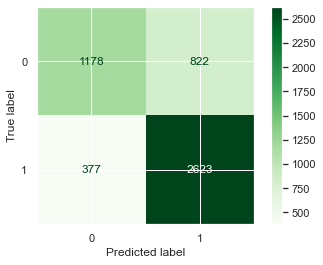

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_couvec_title2, couvec_test_title, y_test2, cmap=plt.cm.Greens, values_format = '.0f')

In [ ]:
rf_couvec_title2 = RandomForestClassifier()
rf_couvec_title2.fit(couvec_train_title, y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = rf_couvec_title2.predict(couvec_test_title)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2000
           1       0.77      0.84      0.80      3000

    accuracy                           0.76      5000
   macro avg       0.75      0.73      0.74      5000
weighted avg       0.75      0.76      0.75      5000



Se puede notar como aumentan las metricas, no solo el Accuracy sino tambien precision y recall por ejemplo. Esta puede ser una opción para clasificar de mejor manera estos problemas.

---
### CONTINUACIÓN DE LAS RESPUESTAS

2. Crear un diccionario robusto en español, especifico para estos casos (review de productos) y así tener mas control de los Stopwords (como lo realizan [aquí](https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/)) porque por ejemplo la palabra "no" suele ser fundamental en la clasificación de 1 a 3 estrellas pues tiende a ser una palabra negativa pero al estar en la lista de Stopwords de la libreria de Spacy y NLTK no se usa para la clasificación. Haría un analisis mas profundo de que frases y palabras son las mas comunes en español cuando se quiere criticar y clasificar con estrellas un producto. 

Con este diccionario esperaría que se mejore el Accuracy porque se tiene mas definidos las palabras y frases que se utilizan de acuerdo a la clasificación por estrellas y resultaría mas facil para el modelo de predicción.


3. Realizar un analisis de sentimientos para ver como resulta la clasificación. Para ello, utilizaría la libreria Textblob util para la clasificación de textos basandose en los sentimientos (como lo dice su pagina web [aquí](https://textblob.readthedocs.io/en/dev/)), aunque tendría que traducir todos los documentos porque esta librería solo funciona en ingles.


Con esta librería es posible que de acuerdo a el estudio de sentimiento que se hagan por medio de las criticas hechas a cada producto se pueda clasificar mejor el rating o mejorar la clasificación binarizada.





---
Conclusión Proyecto 3

NLP es una area demasiado interesante por el alcance que tiene al querer que una maquina entienda el lenguaje humano de la manera mas natural y simple posible. Para tener un correcto resultado, hay que investigar muy bien sobre el idioma que se está trabajando y explorar muy bien los datos. Por ejemplo en el caso del español, juega un papel importante las conjugaciones de los verbos y las tildes, pues si hay una palabra que incluya estas dos aclaraciones y si está mal escrito, puede distorcionar en gran medida los resulados del modelo.

---
# Continuación Proyecto 4
---

Para este caso quiero aplicar algo nuevo relacionado con Deep Learning, puesto que el tema me llamo demasiado la atención y seguí investigando por mi propia cuenta para profundizar.

En este casó implementaré el uso de la libreria de Keras de Tensor Flow (no utilizado durante las clases) para ejecutar una red neuronal.
Para ellostuve en cuenta los siguientes aspectos:
- Al ser un caso de clasificación multiple (Rating de estrellas de 1 a 5) debo utilizar una función de activación util para ello, en este caso utilizaré una función de costo llamada "categorical_crossentropy" que sirve para estos casos de multiclasificación.
- Al tener 5 opciones en la clasificación, tengo que usar un One Hot Encoded en la columna del target para que la red neuronal de Keras lo pueda interpretar bien y realice el entrenamiento de acuerdo a los resultados generados por este metodo.
- La capa de salida será de 5 neuronas y su función de activación es "softmax" que es utilizado en los problemas de clasificación porque el resultado puede ser interpretado como una distribución de probabilidad.

---

#### De acuerdo a esto, planteo la siguiente pregunta:

¿Son mas efectivas las redes neuronales? Si es así, ¿Por qué no se utilizan mas a menudo en reemplazo de los modelos de regresión y clasificación supervisada vistos durante la carrera?

---

Guardamos los datasets ya analizados para no tener que realizar estos procesos nuevamente.

In [ ]:
dataset_train.to_json ('dataset_train_clean.json')

In [ ]:
dataset_test.to_json ('dataset_test_clean.json')

In [2]:
dataset_train = pd.read_json('dataset_train_clean.json')
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_lemma,review_title_lemma
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno fue pantalla menos meses recibido r...,television nevir,es,electronics,pantalla mesar recibir respuesta fabricante,television nevir
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,horrible nos tuvimos que comprar otro porque n...,dinero tirado basura con esta compra,es,electronics,horrible tener comprar inglés informático hora...,dinero tirar basura comprar
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,,solo llega una unidad cuando obligan comprar dos,es,drugstore,,llegar unidad obligar comprar
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,ustedes deciden,producto recibido,es,wireless,decidir,producto recibir
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde talla equivocada,devuelto,es,shoes,llegar tallar equivocar,devolver


In [3]:
dataset_test = pd.read_json('dataset_test_clean.json')
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_lemma,review_title_lemma
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,llego articulo mando por correos normal sin se...,llego,es,wireless,llegar articular mandar correo normal seguimie...,llegar
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,mensajería horrible compro mas,amazon sigue sin cumplir las entregas,es,home,mensajería horrible comprar,amazon cumplir entregar
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,recomiendo nada,estafa envío,es,toy,recomer,estafar enviar
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,inverosímil ocurrido pero ultima palabra dará ...,estafa amazon,es,home,inverosímil ocurrir ultimar palabra dar oficin...,estafar amazon
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,puedo valorar nada nada,conseguí pasar portada kindle,es,digital_ebook_purchase,valorar,conseguir pasar portar kindle



---
Aplicamos la vectorización anteriormente realizada 

In [4]:
Count_Body = list(dataset_train.review_body_lemma.values)
Count_Title = list(dataset_train.review_title_lemma.values)
Estrellas = dataset_train.stars.values

In [5]:
cou_vec=CountVectorizer(ngram_range=(1, 5))
#cou_vec=CountVectorizer()
X1 = cou_vec.fit_transform(Count_Title)

In [6]:
# Tomamos las palabras
all_words = cou_vec.get_feature_names()

#Vizualizamos las 150 palabras o pequeñas frases mas usadas
print("150 palabras mas usadas: ",all_words[0:150])

150 palabras mas usadas:  ['10', '10 remachar', 'aaa', 'aaaaa', 'aaron', 'abajar', 'abajar calidad', 'abajar ceder', 'abajar duro', 'abajar fundir', 'abajar fundir plastico', 'abajar fundir plastico malo', 'abajar pequeño', 'abajar pequeño tocar', 'abajar perder', 'abajar play', 'abajar play stop', 'abajar servir', 'abalorio', 'abandonar', 'abandonar librar', 'abandonar librar buzón', 'abandonar librar buzón forzándolo', 'abanicar', 'abanicar cutre', 'abanico', 'abanico blanco', 'abanico blanco corazón', 'abanico perfecto', 'abanico perfecto recordar', 'abar', 'abarcar', 'abarcar año', 'abarcar concepto', 'abarcar concepto fundamental', 'abarcar pantalla', 'abarcar pantalla entero', 'abarcar pantalla susceptible', 'abarcar pantalla susceptible pequeño', 'abarcar pantalla susceptible pequeño fracturar', 'abarcar reducir', 'abarcar reducir librar', 'abascal', 'abastecimiento', 'abastecimiento tinto', 'abatible', 'abc', 'abdel', 'abdomen', 'abdominal', 'abdominal funcionar', 'abdominal re

In [7]:
y_train=(dataset_train['stars'].values)
y_test=(dataset_test['stars'].values)
X_train=(dataset_train['review_title_lemma'].values)
X_test=(dataset_test['review_title_lemma'].values)

In [8]:
X_train1 = cou_vec.transform(X_train)
X_test1  = cou_vec.transform(X_test)

In [9]:
X_train1

<200000x161019 sparse matrix of type '<class 'numpy.int64'>'
	with 541096 stored elements in Compressed Sparse Row format>

In [10]:
X_train1[1]

<1x161019 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [11]:
X_train1.shape

(200000, 161019)

In [12]:
X_test1.shape

(5000, 161019)

In [13]:
print(X_train1[1])

  (0, 12611)	1
  (0, 12624)	1
  (0, 31689)	1
  (0, 46902)	1
  (0, 47005)	1
  (0, 47006)	1
  (0, 47007)	1
  (0, 150925)	1
  (0, 150936)	1
  (0, 150940)	1


In [14]:
y_train

array([1, 1, 1, ..., 5, 5, 5])

In [17]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.optimizers import SGD
#from keras.utils import to_categorical

In [18]:
y_train=(dataset_train['stars'].values)
y_test=(dataset_test['stars'].values)

In [19]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [20]:
y_train = y_train.values
y_test = y_test.values
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [21]:
input_dim = X_train1.shape[1]  #Esto es el número de Features
opt = SGD(lr=0.01, momentum=0.9)
model = Sequential() #Modelo apropiado para hacer un grupo de capas, donde cada capa tiene una entrada y una salida
model.add(layers.Dense(50, input_dim=input_dim, activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
#mean_squared_error=Para problemas de regresión, es el MSE
#mean_squared_logarithmic_error=Regresión
#mean_absolute_error=Regresión (MAE)
#binary_crossentropy=Para problemas de clasificación binaria
#hinge=Para clasificación binaria, util con el modelo SVM (TARGET ENTRE -1 Y 1)
#squared_hinge
#categorical_crossentropy = Para problemas de clasificación no binaria
#sparse_categorical_crossentropy = Clasificación no binaria util en procesos de One hot Encoded
#kullback_leibler_divergence


model.compile(loss='categorical_crossentropy', 
               optimizer=opt, 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                8051000   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 255       
Total params: 8,051,255
Trainable params: 8,051,255
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train1, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test1, y_test),
                    batch_size=64)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [24]:
loss, accuracy = model.evaluate(X_train1, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test1, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6240
Testing Accuracy:  0.4014


In [25]:
history.history

{'accuracy': [0.3592750132083893,
  0.40143999457359314,
  0.4153749942779541,
  0.42357000708580017,
  0.4325299859046936,
  0.4407849907875061,
  0.4487150013446808,
  0.45758000016212463,
  0.4662550091743469,
  0.4767799973487854,
  0.4885050058364868,
  0.4988499879837036,
  0.510574996471405,
  0.5216799974441528,
  0.5300999879837036,
  0.5411850214004517,
  0.5483700037002563,
  0.5573650002479553,
  0.5651500225067139,
  0.5711100101470947,
  0.577875018119812,
  0.5825150012969971,
  0.5869600176811218,
  0.5894150137901306,
  0.5937049984931946,
  0.5973299741744995,
  0.5998449921607971,
  0.6024349927902222,
  0.6040350198745728,
  0.6047549843788147,
  0.6068699955940247,
  0.6068900227546692,
  0.6070200204849243,
  0.6070650219917297,
  0.6072350144386292,
  0.6084250211715698,
  0.6101049780845642,
  0.609125018119812,
  0.6098200082778931,
  0.6093549728393555,
  0.6103000044822693,
  0.6090400218963623,
  0.6102349758148193,
  0.6103600263595581,
  0.6103649735450745

In [47]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Accuracy en el Train y Test')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training y validation loss')
    plt.legend()

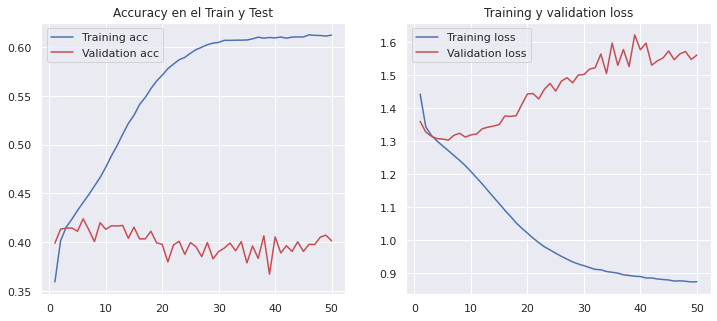

In [48]:
plot_history(history)

El mejor modelo de clasificación en el proyecto pasado fue Linear SVC con un accuracy de 0.42, le sigue el modelo de RandomForest con 0.40. Y la red neuronal con 0.40. No optimicé mas la red neuronal porque mi computador no le daba la capacidad para simularlo.

---
#### Conclusión y respuesta a la pregunta inicial


Las redes neuronales tienden a ser una herramienta muy util por su alta efectividad y confiabilidad en la mayoría de los casos de clasificación y regresión. Además de que son muy parametrizables de acuerdo al problema presente por su extendida lista de funciones de activación y la variedad de formas en las que se pueden utilizar las capas y neuronas. Por estas y muchas razones más se puede pensar que son mas necesitadas que los modelo supervisados (Machine Learning) vistos. Sin embargo, un modelo bien analizado e implementado tiende a tener los mismos resultados que una red neuronal. A mi concepto, utilizaría las redes neuronales cuando se tienen una inmensa cantidad de datos y cuando son datos con cantidades mas considerables preferiría utilizar los modelos de Machine Learning puesto que en una comparación de rendimiento, las redes neuronales me generarían un gasto computacional mucho mas alto.

---